In [1]:
library(tidyverse)
#library(cowplot)
#theme_set(theme_cowplot())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#source("../color_df.R")

Q <- read_delim("../data/ngsAdmix/v5--Teo_K6.qopt", delim = " ", col_names = FALSE)
    
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "Teo") %>% 
    select(JRIAL_ID, geo) %>% 
    distinct()

Q_df <- 
    bind_cols(Q, key) %>% 
    #left_join(., key, by = "JRIAL_ID")  %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))
    #filter(!geo %in% c("random"))
    #filter(!geo %in% c("random", "random2_Palmar_Chico", "random1_Palmar_Chico", "Palmar_Chico"))

Q_df

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_logical()
)

Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)



JRIAL_ID,geo,bin,prop
<chr>,<chr>,<chr>,<dbl>
JRIAL10-31,Amatlan_de_Canas,X4,1e+00
JRIAL10-32,Amatlan_de_Canas,X4,1e+00
JRIAL10-33,Amatlan_de_Canas,X4,1e+00
JRIAL10-35,Amatlan_de_Canas,X4,1e+00
JRIAL10-36,Amatlan_de_Canas,X4,1e+00
JRIAL10-34,Amatlan_de_Canas,X4,1e+00
JRIAL10-37,Amatlan_de_Canas,X4,1e+00
JRIAL10-38,Amatlan_de_Canas,X4,1e+00
JRIAL10-39,Amatlan_de_Canas,X4,1e+00


In [5]:
color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)
) %>% 
    select(-geo)

#Q_df  <-  Q_df %>% 
#            full_join(., color_key, by = c("bin")) %>%
#            arrange(JRIAL_ID, mean_p)


ERROR: Error in eval(lhs, parent, parent): object 'color_df' not found


Warning message:
“Removed 126 rows containing missing values (position_stack).”


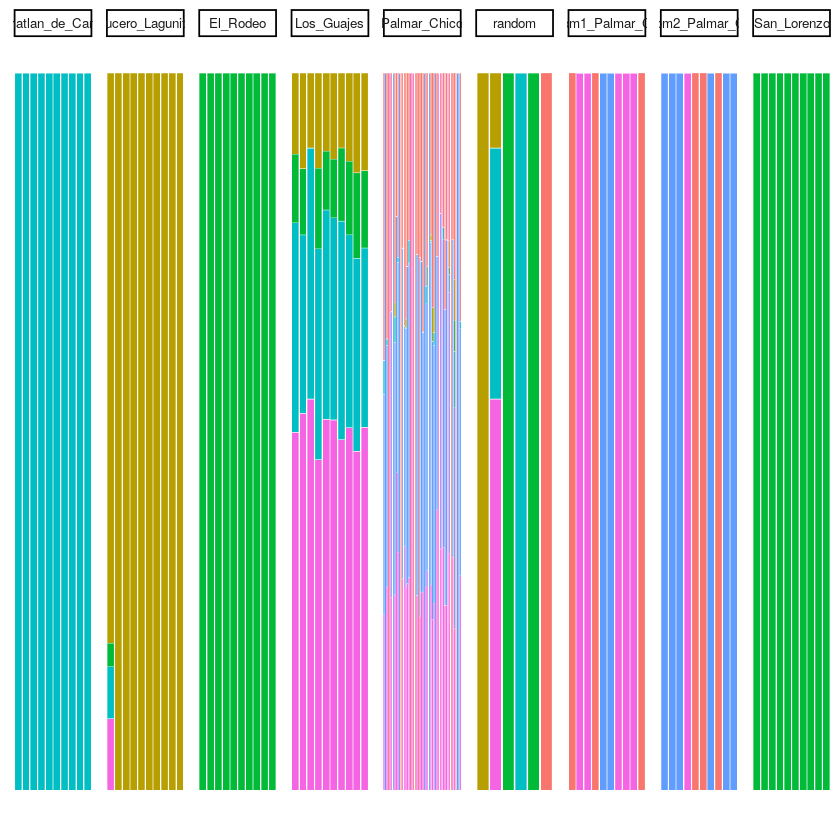

In [3]:
Q_df %>%
    ggplot(aes(JRIAL_ID, prop, fill = bin)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme_classic() +
    theme(
        strip.text.x = element_text(size = 8),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )

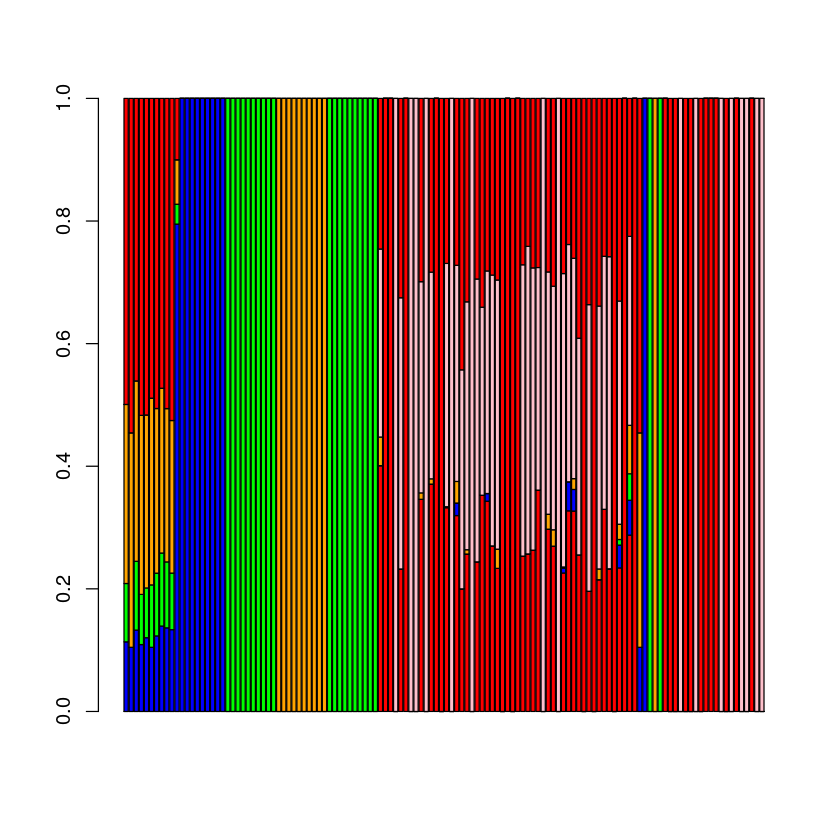

In [4]:
barplot(t(Q), col = c("red", "blue", "green", "orange", "pink"))